### Importing Required Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='dark')

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

### Load the Dataset

In [2]:
data = pd.read_csv('C:/Users/S_The/Downloads/top50.csv')
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Drop "Unnamed: 0" column

In [3]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
data.shape

(50, 13)

In [5]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [6]:
data.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

**Calculating the number of songs by genre**

In [7]:
data.Genre.value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton flow      2
country rap         2
electropop          2
canadian pop        2
reggaeton           2
panamanian pop      2
dfw rap             2
brostep             2
boy band            1
trap music          1
atl hip hop         1
big room            1
pop house           1
r&b en espanol      1
australian pop      1
escape room         1
Name: Genre, dtype: int64

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Genre')

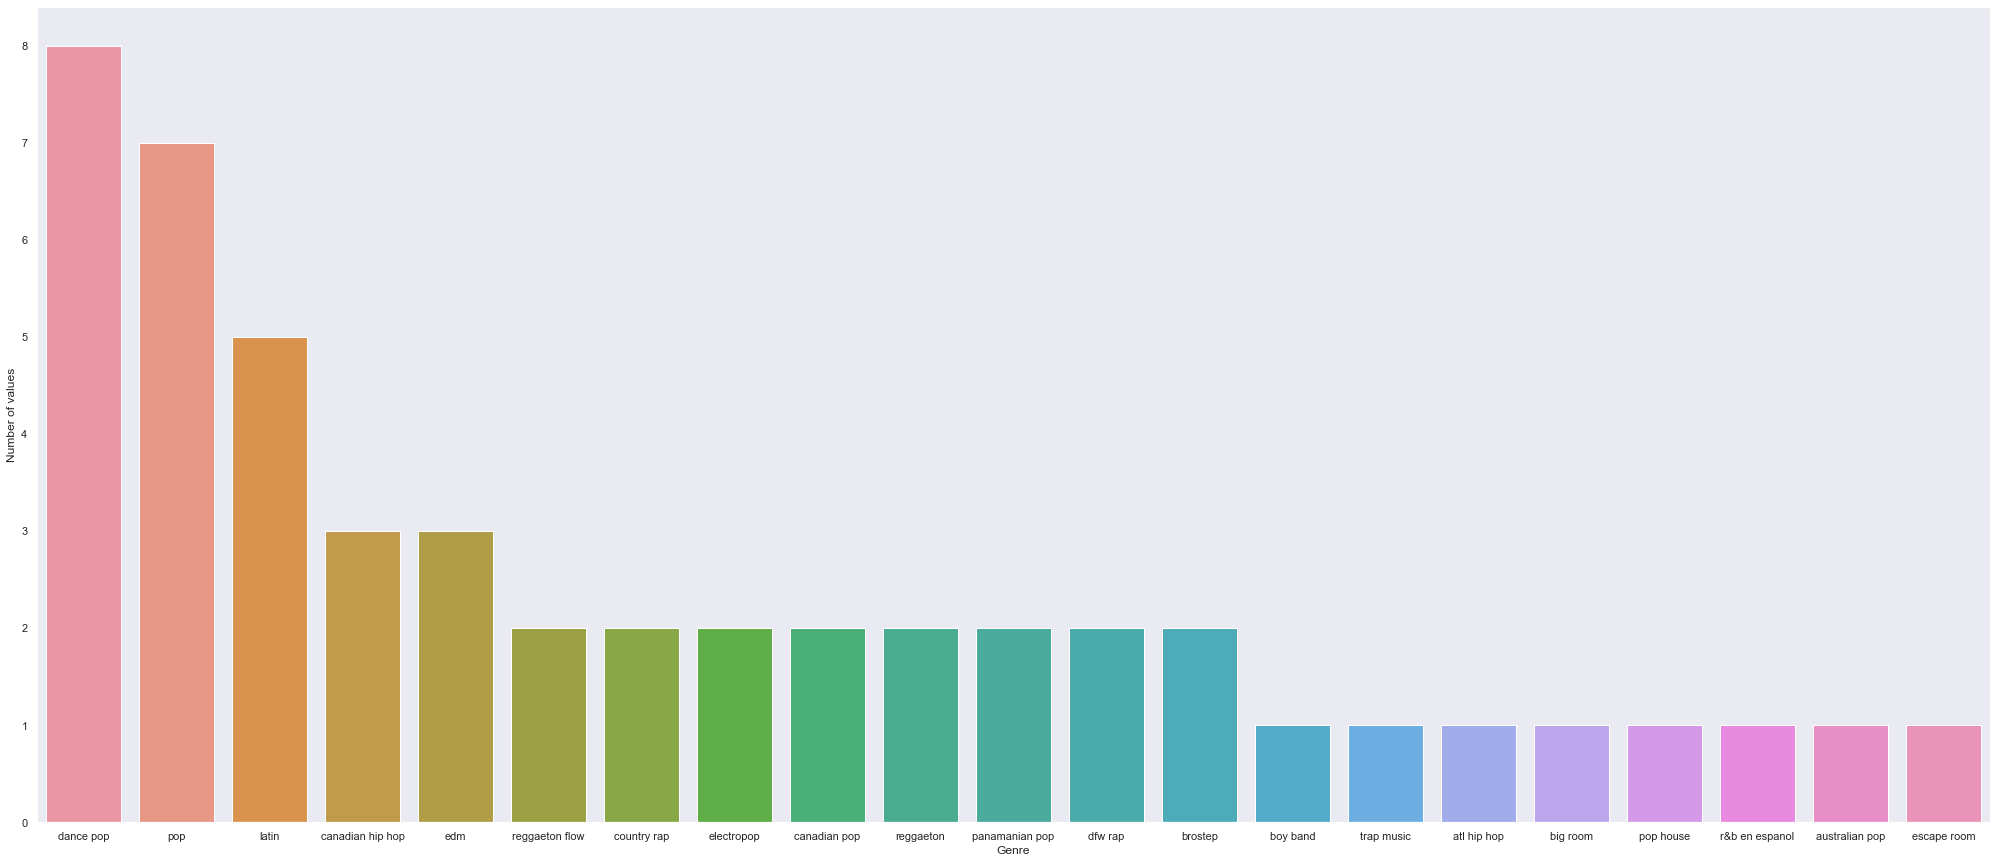

In [8]:
values = data.Genre.value_counts()
indexes = values.index

fig = plt.figure(figsize=(35, 15))
sns.barplot(indexes, values)

plt.ylabel('Number of values')
plt.xlabel('Genre')

**Liveness distribution**

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Liveness')

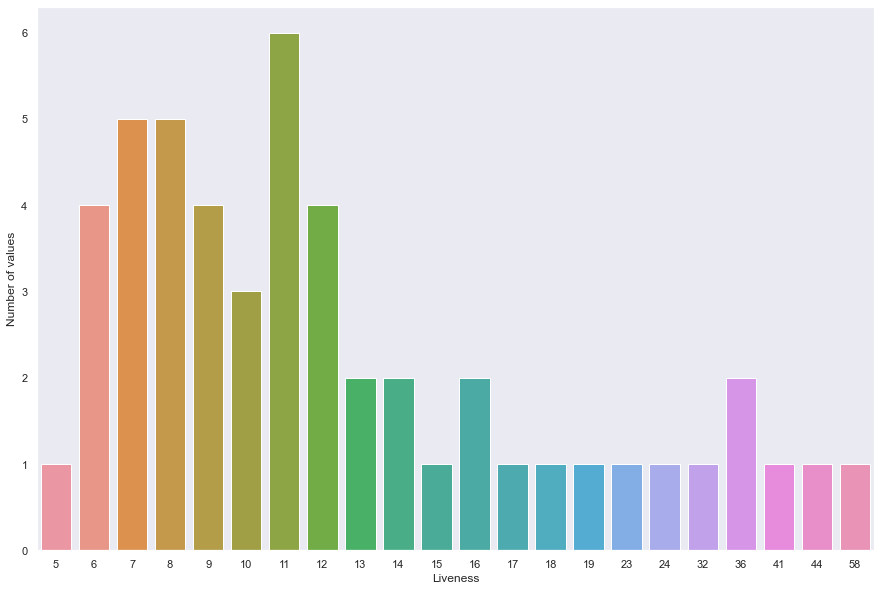

In [9]:
values = data.Liveness.value_counts()
indexes = values.index

fig = plt.figure(figsize=(15, 10))
sns.barplot(indexes, values)

plt.ylabel('Number of values')
plt.xlabel('Liveness')

In [10]:
data.rename(columns={'Track.Name':'Track_Name', 'Artist.Name':'Artist_Name',
                      'Beats.Per.Minute':'Beats_Per_Minute', 'Loudness..dB..':'Loudness',
                      'Valence.':'Valence', 'Length.':'Length', 'Acousticness..':'Acousticness', 'Speechiness.':'Speechiness'}, inplace=True)
data.drop('Track_Name', axis=1, inplace=True)
data.head()

,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


**BPM distribution.used a function to split "Beats_Per_Minute" column by groupes**

In [11]:
data.Beats_Per_Minute.describe()

count     50.000000
mean     120.060000
std       30.898392
min       85.000000
25%       96.000000
50%      104.500000
75%      137.500000
max      190.000000
Name: Beats_Per_Minute, dtype: float64

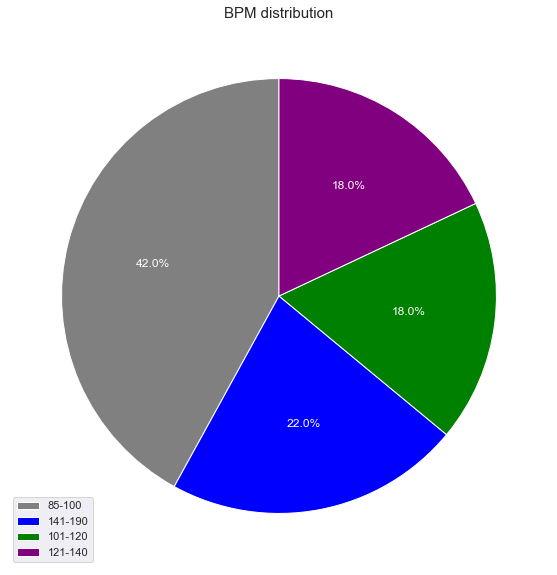

In [12]:
def transform(x):
  if x <= 100:
    return '85-100'
  elif x <= 120:
    return '101-120'
  elif x <= 140:
    return '121-140'
  else:
    return '141-190'

groups_of_bpm = data.Beats_Per_Minute.apply(transform)

values = groups_of_bpm.value_counts()
labels = values.index
colors = ['grey', 'blue', 'green', 'purple']
fig = plt.figure(figsize=(15, 10))
plt.pie(values, colors=colors, autopct='%1.1f%%', startangle=90, textprops={ 'color': 'w' })
plt.title('BPM distribution', fontsize=15)
plt.legend(labels)
plt.show()

### Correlation heatmap

<AxesSubplot:>

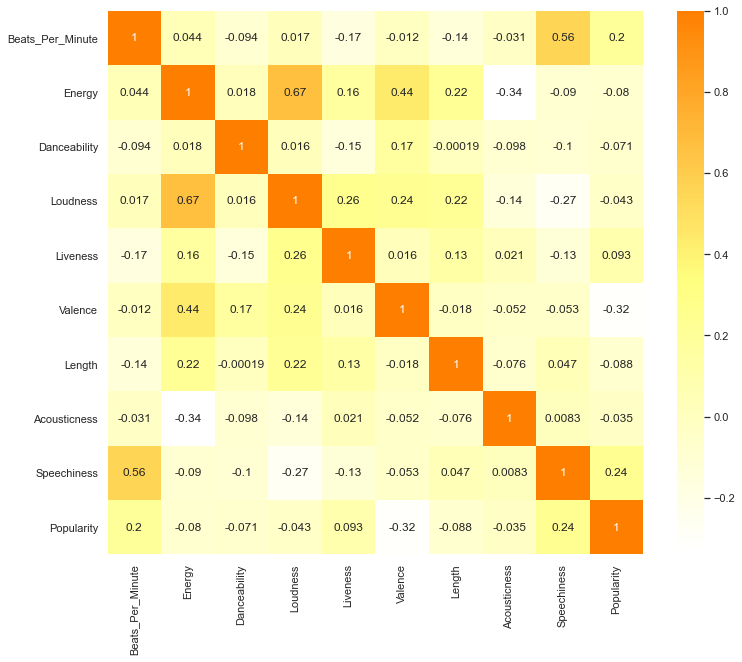

In [13]:
correlations = data.corr()

fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='afmhot_r', center=1)

Relationship between energy and loudness (quite good correlation)

<AxesSubplot:xlabel='Energy', ylabel='Loudness'>

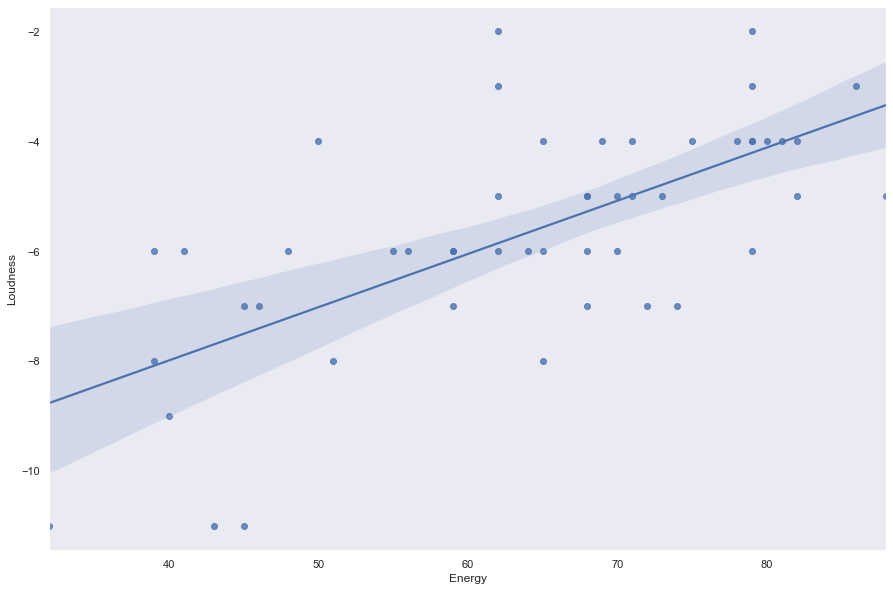

In [14]:
fig = plt.figure(figsize=(15, 10))
sns.regplot(x='Energy', y='Loudness', data=data)

## Data preprocessing

*Encoding categorical features*

In [15]:
le = LabelEncoder()

for col in data.columns.values:
  if data[col].dtypes == 'object':
    le.fit(data[col].values)
    data[col] = le.transform(data[col])

data.head()

,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,32,6,117,55,76,-6,8,75,191,4,3,79
1,1,19,105,81,79,-4,8,61,302,8,9,92
2,2,8,190,80,40,-4,16,70,186,12,46,85
3,9,15,93,65,64,-8,8,55,198,12,19,86
4,28,9,150,65,58,-4,11,18,175,45,7,94


Let's find the best features (according to the heatmap too)

In [16]:
X = data.drop('Loudness', axis=1)
y = data.Loudness

selector = SelectKBest(score_func=f_classif, k=5)
fitted = selector.fit(X, y)
features_scores = pd.DataFrame(fitted.scores_)
features_columns = pd.DataFrame(X.columns)

best_features = pd.concat([features_columns, features_scores], axis=1)
best_features.columns = ['Feature', 'Score']
best_features.sort_values(by='Score', ascending=False, inplace=True)
best_features

,Feature,Score
3,Energy,5.825217
9,Speechiness,2.038223
0,Artist_Name,1.486520
8,Acousticness,1.260422
6,Valence,1.012069
1,Genre,0.955362
5,Liveness,0.945555
7,Length,0.830869
4,Danceability,0.695290
2,Beats_Per_Minute,0.580578


## Model Training

Split data. Actually we ain't drop columns as we have only 10 (except Artist_Name since there are too many artists and it becomes useless).

In [17]:
X.drop('Artist_Name', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
46,13,176,75,67,8,80,202,24,6,88
47,4,100,79,69,17,67,214,19,5,88
15,8,93,45,70,16,14,261,12,15,82
9,11,135,43,70,10,56,194,33,38,95
16,13,176,65,75,11,43,243,15,32,90
24,11,135,45,67,12,68,195,25,30,89
34,8,100,88,77,32,39,224,19,6,89
31,8,140,32,78,9,33,179,59,33,89
0,6,117,55,76,8,75,191,4,3,79
44,17,98,69,88,5,75,162,39,12,88


**Scaling the data**

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

**Apply Linear Regression on the data**

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(regressor.intercept_, regressor.coef_)
print(mean_squared_error(y_test, y_pred))

-5.878787878787879 [-0.08081003  0.31432331  1.54601124 -0.09561211  0.14983013 -0.09416585
  0.3376415   0.18716505 -0.70038778 -0.13967672]
3.5210114507517


**Apply Support Machine Regression**

In [20]:
regressor = SVR(C=0.5)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test, y_pred))

2.751195308540081


**Apply K-Means Clustering. Actually, I think MSE is excessively high since our data is too small**

In [21]:
clustering = KMeans(n_clusters=2)
clustering.fit(X_train, y_train)

y_pred = clustering.predict(X_test)
print(mean_squared_error(y_test, y_pred))

38.35294117647059


SVR performs better than others